In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [4]:
type(data)
# sklearn.utils.Bunch works as dictionaries

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(data.data.shape)
print(data.target.shape)

(569, 30)
(569,)


In [7]:
#print(data.target)
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
N, D = X_train.shape
print(N, D)

398 30


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#We do this on the training set of data.
#1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.
#2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.
#3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

In [12]:
# Building a model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

#also can be used as below
#model = tf.keras.models.Sequential([
#  tf.keras.layers.Input(shape=(D,)),
#  tf.keras.layers.Dense(1, activation='sigmoid')
#])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 0s 14ms/step - loss: 0.4300 - accuracy: 0.8191 - val_loss: 0.3902 - val_accuracy: 0.8480
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.8417 - val_loss: 0.3619 - val_accuracy: 0.8596
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3698 - accuracy: 0.8568 - val_loss: 0.3377 - val_accuracy: 0.8713
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.8643 - val_loss: 0.3163 - val_accuracy: 0.8713
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.8794 - val_loss: 0.2970 - val_accuracy: 0.8772
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8844 - val_loss: 0.2802 - val_accuracy: 0.8889
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3053 - accuracy: 0.8920 - val_loss: 0.2651 - val_accuracy: 0.9240
Epoch 8/100


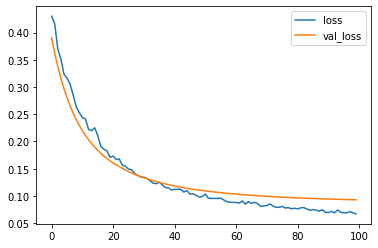

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

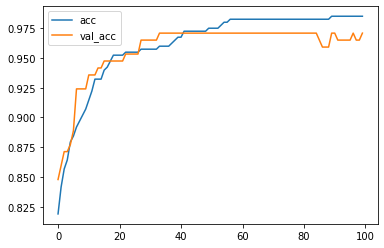

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
#predictions

P = model.predict(X_test)
print(P)

[[9.56378222e-01]
 [9.92071033e-01]
 [2.47808907e-06]
 [7.82032132e-01]
 [9.97141898e-01]
 [9.96753275e-01]
 [9.53311682e-01]
 [9.99516487e-01]
 [5.09470701e-04]
 [5.44181466e-03]
 [9.94326413e-01]
 [4.26493388e-14]
 [1.32706382e-05]
 [9.94480312e-01]
 [4.68955338e-02]
 [9.98869836e-01]
 [9.99008894e-01]
 [8.36217523e-01]
 [9.78005111e-01]
 [9.39445376e-01]
 [9.99919116e-01]
 [1.79260969e-04]
 [2.69166231e-02]
 [9.96472597e-01]
 [9.66396391e-01]
 [2.05177963e-02]
 [9.97590721e-01]
 [8.81594300e-01]
 [3.29113334e-01]
 [1.64636195e-01]
 [9.99506891e-01]
 [9.05761540e-01]
 [9.83399987e-01]
 [4.03826525e-05]
 [8.57396543e-01]
 [1.53800845e-02]
 [9.99289036e-01]
 [2.75970757e-01]
 [7.37183470e-09]
 [3.15444082e-01]
 [3.12669575e-02]
 [1.17588543e-08]
 [9.77196813e-01]
 [9.93607223e-01]
 [6.97689712e-01]
 [9.46603477e-01]
 [9.99215126e-01]
 [5.17846406e-01]
 [5.05484223e-01]
 [3.72171402e-04]
 [8.68388772e-01]
 [9.96986508e-01]
 [2.83867121e-04]
 [9.99969602e-01]
 [7.23892748e-02]
 [9.888720

In [16]:
# rounding the predictions to get the class here either 0 or 1 and converting into vector
import numpy as np
print(P.shape)
P = np.round(P).flatten()
print(P)
print(P.shape)

(171, 1)
[1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 1.]
(171,)


In [17]:
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9707602339181286
6/6 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9708
Evaluate output: [0.0928100049495697, 0.9707602262496948]


In [0]:
# Saving the model
model.save('TF2_0_LPUDEMY_linearclassifier.h5')

In [19]:
!ls -l

total 24
drwxr-xr-x 1 root root  4096 Apr  3 16:24 sample_data
-rw-r--r-- 1 root root 18480 Apr 19 13:44 TF2_0_LPUDEMY_linearclassifier.h5


In [20]:
#loading saved model

model = tf.keras.models.load_model('TF2_0_LPUDEMY_linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9708


[0.0928100049495697, 0.9707602262496948]

In [0]:
# downloading our model to loacl machine

#from google.colab import files
#files.download('TF2_0_LPUDEMY_linearclassifier.h5')